# Data Science Concepts Overview INFO 6105
 Data Science Engineering Methods and Tools - Prof Nick Bear Brown

Notebook prepared by Chinmay Mahesh Deshpande

## Introduction


---

**Introduction**

This Jupyter Notebook is prepared as part of the formal coursework for INFO , 6105 Data Science Engineering Methods and Tools, aiming to elucidate a variety of data science concepts. It meticulously covers the progression from elementary data handling and visualization techniques to sophisticated analytical methods including machine learning and deep learning models. The notebook leverages Python and its robust libraries to demonstrate practical implementations on real-world datasets. Through this comprehensive guide, students are expected to acquire a thorough understanding of essential data science techniques, facilitating their ability to apply these methods in solving complex analytical problems effectively.

### Datasets Used in This Notebook

This notebook employs two well-known datasets in the data science community, each chosen for its particular features that demonstrate key data science techniques effectively.

1. **Iris Dataset**
   - **Source**: This dataset is available from the UCI Machine Learning Repository and is commonly included in Seaborn's library for easy access.
   - **Description**: The Iris dataset is a classic dataset used in data science and machine learning education. It includes 150 observations from three species of Iris flowers: Iris setosa, Iris virginica, and Iris versicolor. Each observation comprises four measurements: the lengths and the widths of the sepals and petals.
   - **Purpose**: The Iris dataset is utilized in this notebook to demonstrate various data handling and analysis techniques, including data visualization, exploratory data analysis (EDA), and machine learning algorithms such as logistic regression and decision trees. Its simple yet informative feature set makes it ideal for illustrating the principles of classification and clustering.

2. **MNIST Handwritten Digits Dataset**
   - **Source**: This dataset is widely available and can be easily accessed through TensorFlow/Keras datasets, which simplifies the process of downloading and using the data in machine learning models.
   - **Description**: The MNIST dataset comprises 70,000 images of handwritten digits (0 through 9), divided into a training set of 60,000 images and a test set of 10,000 images. Each image is a 28x28 pixel grayscale representation of a digit, which has been size-normalized and centered in a fixed-size image.
   - **Purpose**: The MNIST dataset is primarily used in this notebook to introduce and explore the capabilities of Convolutional Neural Networks (CNNs). It serves as an exemplary case for understanding how deep learning can be effectively applied to image recognition tasks. Demonstrating a CNN with MNIST allows students to learn about image preprocessing, layer construction, model training, and evaluation within the context of a practical and visually interpretable problem.

These datasets are integral to the notebook, providing practical examples that help bridge theoretical concepts with real-world application in data science. Each dataset's characteristics challenge and engage learners, enhancing their analytical skills and understanding of machine learning techniques.

## Data Visualization with Matplotlib

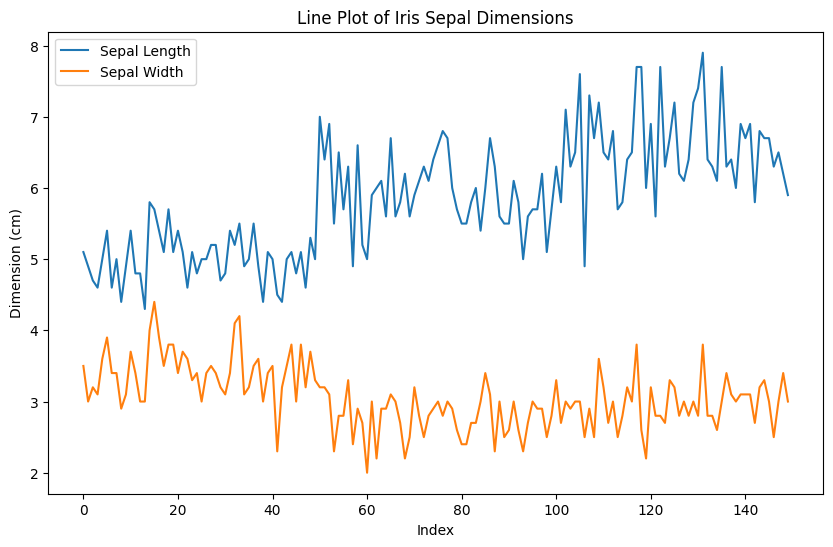

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
# Line Plot
plt.figure(figsize=(10,6))
plt.plot(df['sepal_length'], label='Sepal Length')
plt.plot(df['sepal_width'], label='Sepal Width')
plt.title('Line Plot of Iris Sepal Dimensions')
plt.xlabel('Index')
plt.ylabel('Dimension (cm)')
plt.legend()
plt.show()

Data visualization is a powerful technique in data science for exploring, analyzing, and communicating data insights visually. Matplotlib, a comprehensive library for creating static, animated, and interactive visualizations in Python, is a popular tool among data scientists for its versatility and ease of use. Below, I’ll explain how Matplotlib is used for data visualization, focusing on its functionality and how it can be effectively applied.

Overview of Matplotlib
Matplotlib is one of the most widely used data visualization libraries in Python. It was created by John D. Hunter and is designed to work well with NumPy and Pandas data structures, integrating seamlessly with SciPy and other scientific computing libraries in Python. It offers a range of plotting functions to create standard and advanced plots, from simple line graphs to complex heatmaps and 3D plots.

Key Features of Matplotlib
Plot Types: Matplotlib supports a vast array of plot types. Some of the most commonly used plots include:
Line plots
Scatter plots
Bar charts and histograms
Pie charts
Stacked plots
Error charts
Box plots
Heatmaps
3D plots
Customization: Every aspect of a plot can be customized in Matplotlib, from colors, labels, and lines to the plot layout itself. This flexibility allows the user to tailor plots for specific needs, which is particularly useful for publication-quality graphics.
Integration: It works well with many operating systems and graphics backends, and it integrates with many of the UI toolkits for Python such as Tkinter, WXPython, and Qt. Furthermore, Jupyter notebooks support Matplotlib’s interactive mode, which makes Matplotlib a versatile choice for exploratory data analysis in notebooks.

Matplotlib is a cornerstone in the Python data visualization landscape. Whether for quick data exploration or detailed reports and presentations, it provides the tools necessary to convey data insights effectively. By learning Matplotlib, data scientists and analysts equip themselves with a crucial skill that enhances their data storytelling capabilities.




## Linear Regression

Model slope: [ 1.75575952 -1.34152463], Model intercept: -2.365531737511894


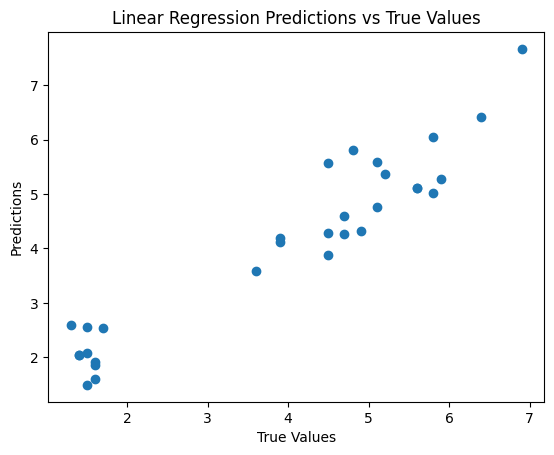

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[['sepal_length', 'sepal_width']]
y = df['petal_length']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Model slope: {model.coef_}, Model intercept: {model.intercept_}')
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.show()

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. In the context of the Iris dataset, we can use linear regression to predict a continuous variable, such as petal length, based on other measurements like sepal length and sepal width.

Linear Equation: At its core, linear regression fits a linear equation to the observed data. The simplest form of a linear regression equation with one variable is
𝑦
=
𝑚
𝑥
+
𝑏
y=mx+b, where:
𝑦
y is the dependent variable,
𝑥
x is the independent variable,
𝑚
m is the slope of the line,
𝑏
b is the y-intercept.
Slope (
𝑚
m): This represents the change in the dependent variable for each unit change in the independent variable. In simpler terms, it tells you how much
𝑦
y will change when
𝑥
x increases by one.
Intercept (
𝑏
b): This is the value of
𝑦
y when
𝑥
x is zero. It is the point where the regression line crosses the y-axis.

## Regularization


In [3]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print('Lasso Score:', lasso.score(X_test, y_test))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print('Ridge Score:', ridge.score(X_test, y_test))


Lasso Score: 0.8726921253708781
Ridge Score: 0.8915179599164069


Regularization is a technique used in regression models to prevent overfitting by penalizing large coefficients in the model. Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge Regression are two popular methods of regularization. Both methods add a penalty to the loss function, but they differ in how the penalty is applied.

Lasso Regression (L1 Regularization)
Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can lead to sparse models where some coefficients can become zero. That is, lasso can eliminate some features entirely, providing a form of automatic feature selection. The loss function for Lasso is:
𝐿
=
RSS
+
𝜆
∑
𝑖
=
1
𝑛
∣
𝛽
𝑖
∣
L=RSS+λ∑
i=1
n
​
 ∣β
i
​
 ∣
where
RSS
RSS is the Residual Sum of Squares,
𝛽
𝑖
β
i
​
  are the coefficients, and
𝜆
λ is a tuning parameter controlling the strength of the penalty.

Ridge Regression (L2 Regularization)
Ridge regression adds a penalty equal to the square of the magnitude of coefficients. This method doesn't reduce coefficients to zero but it does reduce their size, which helps in reducing model complexity and multicollinearity. The loss function for Ridge is:
𝐿
=
RSS
+
𝜆
∑
𝑖
=
1
𝑛
𝛽
𝑖
2
L=RSS+λ∑
i=1
n
​
 β
i
2
​where all variables are as defined in the Lasso formula.


Regularization helps control for overfitting, particularly when using a dataset with many features or when multicollinearity is present. By adjusting
𝜆
λ, the balance between keeping the model simple and fitting the training data well can be managed.

## Classification

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression for binary classification
y_binary = (df['species'] == 'setosa').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Classification is a core task in machine learning that involves categorizing data into predefined classes or categories. It is a form of supervised learning, where a model is trained using labeled data. The trained model is then used to predict the class labels of new, unseen data. This technique is widely used in various applications, from email spam detection to medical diagnosis, where the objective is to accurately assign each input data to a specific category based on its features.


Logistic Regression is a statistical method for binary classification that can be extended to multiclass classification under certain frameworks like the One-vs-Rest (OvR) scheme. It predicts the probability of the target variable (with categorical values) belonging to a particular class. Logistic regression is particularly useful when the output decision needs to be binary or dichotomous, such as Yes/No, Pass/Fail, Healthy/Sick, etc.

Probability Estimation: Unlike linear regression, logistic regression estimates the probability of a binary outcome based on one or more predictor variables. The output is a value between 0 and 1, obtained using the logistic function, which is an S-shaped curve.
Formula: The logistic function can be written as:

𝑃
(
𝑦
=
1
∣
𝑋
)
=
1/
1
+
𝑒
−
(
𝛽
0
+
𝛽
1
𝑋
)


Here,
𝑃
(
𝑦
=
1
∣
𝑋
)
P(y=1∣X) is the probability that the target variable
𝑦
y is 1 given predictors
𝑋
X,
𝛽
0
β
0
​
  is the intercept, and
𝛽
1
β
1
​
  represents the coefficients of the predictors in the model.

  The Iris dataset is an ideal candidate for logistic regression, especially for educational purposes, because:

Multiclass Classification: Although logistic regression is typically used for binary classification, it can be adapted for the Iris dataset (which has three classes) using techniques like the One-vs-Rest (OvR) approach. In this approach, multiple binary classifiers are trained; each one predicts the probability of belonging to one of the classes versus the others.
Feature Relationships: The dataset includes features (sepal length, sepal width, petal length, petal width) that exhibit a fairly linear relationship with the classes, making it suitable for logistic regression.
Interpretability: Logistic regression models are highly interpretable, meaning you can easily understand the influence of a unit change in a feature on the probability of belonging to a particular class.





## Tree-Based Models

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print('Decision Tree Score:', dtree.score(X_test, y_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Score:', rf.score(X_test, y_test))


Decision Tree Score: 0.9333333333333333
Random Forest Score: 1.0


Tree-based models are a family of machine learning algorithms that use a decision tree structure to make predictions. These models segment the predictor space (the set of possible values for the input variables) into a number of simple regions. To make a prediction for a given observation, one simply follows the decisions in the tree from the root to a leaf, and the prediction corresponds to the mean or mode of the training observations in the region defined by that leaf.

Random Forests: This model is a type of ensemble learning technique that builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random Forests correct for decision trees' habit of overfitting to their training set by averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance.

Decision Trees: The fundamental building block of tree-based models is the decision tree, which is used for both classification and regression tasks. A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g., whether a customer has an income higher than $50K), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.



## Support Vector Machines

In [6]:
from sklearn.svm import SVC

# SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
print('SVM Accuracy:', svm_model.score(X_test, y_test))


SVM Accuracy: 1.0


Support Vector Machines (SVM) are a robust set of supervised learning methods used primarily for classification and regression tasks. At their core, SVMs aim to identify the optimal hyperplane which maximizes the margin between different class labels. This hyperplane serves as a decision boundary, effectively separating different classes in the feature space. SVMs are particularly effective in high-dimensional spaces and are versatile in handling various types of data. They are known for their ability to produce highly accurate and robust classification results, especially in complex datasets where the boundary between classes is not immediately apparent.

## Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


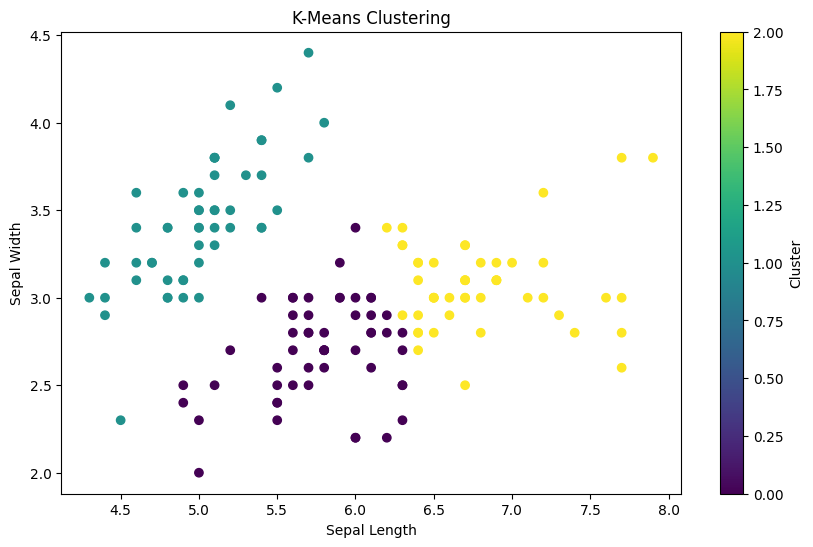

In [7]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['sepal_length', 'sepal_width']])
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'])
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster')
plt.show()


Clustering is a type of unsupervised learning technique used to group a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. It's commonly used in exploratory data analysis to discover natural groupings within data, identify data distribution patterns, and serve as a preprocessing step for other algorithms. Clustering is widely applicable in various fields such as marketing (for customer segmentation), biology (for genetic clustering), and information retrieval (to group similar documents). Common clustering algorithms include K-means, hierarchical clustering, and DBSCAN, each differing in their approach to defining and finding clusters.


K-means is a popular clustering algorithm used in unsupervised machine learning to partition a set of data points into K distinct non-overlapping subgroups (clusters), where K is a predefined number of clusters. The algorithm assigns each data point to the nearest cluster by minimizing the sum of distances between the data points and the centroid of their respective clusters. The process iterates through two main steps: first, randomly assigning initial centroids, and second, optimizing the positions of the centroids to minimize the within-cluster sum of squares. The algorithm converges when there is no change in the assignment of data points to clusters, or the centroids stabilize, providing a simple and efficient way to segment a dataset into groups with similar characteristics.

## EDA

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
spec

Exception ignored in: <function _xla_gc_callback at 0x7bb26474f0a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


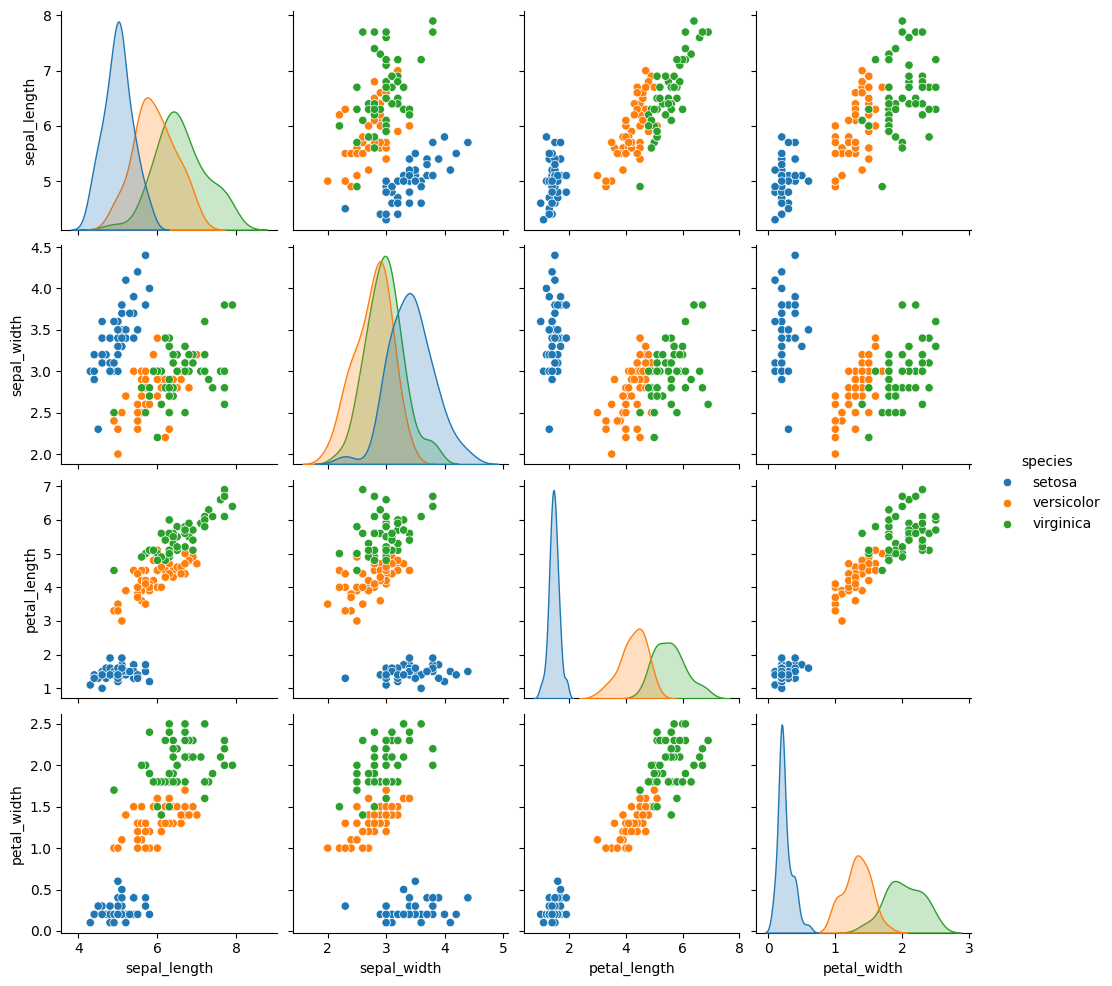

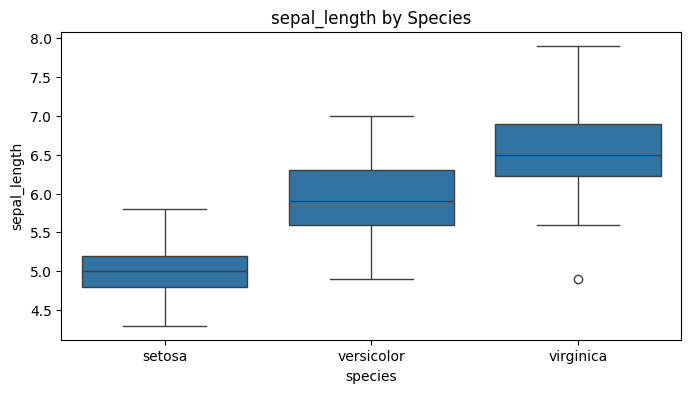

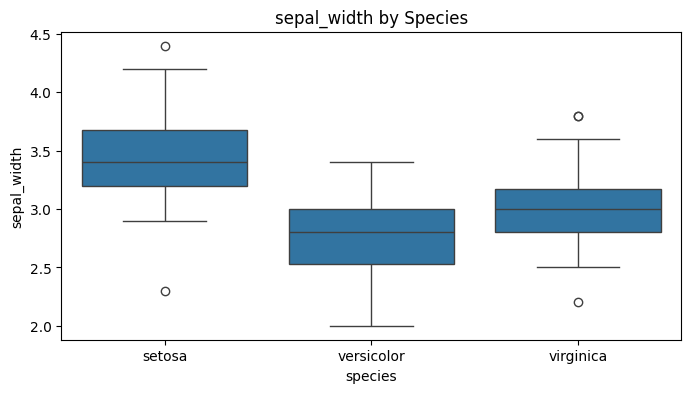

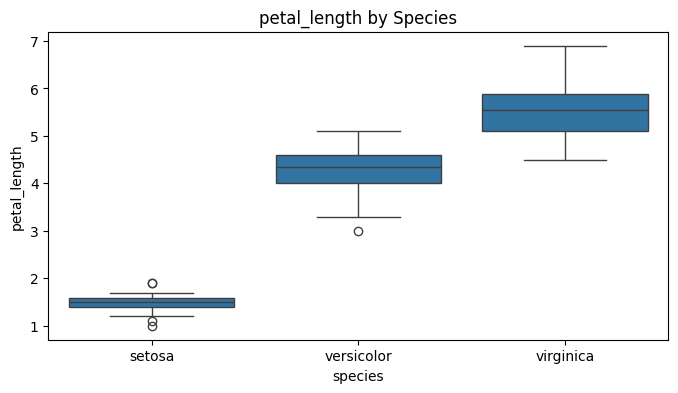

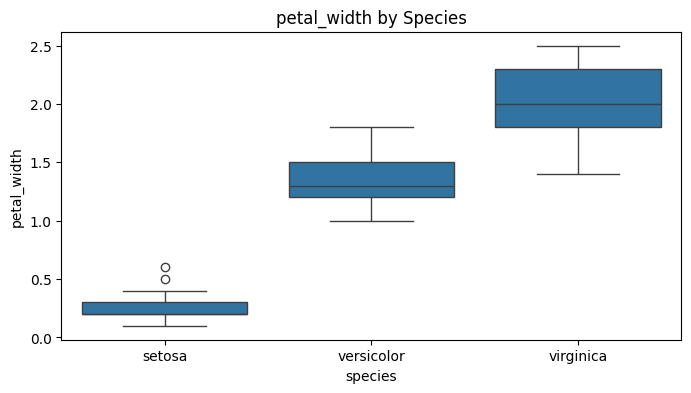

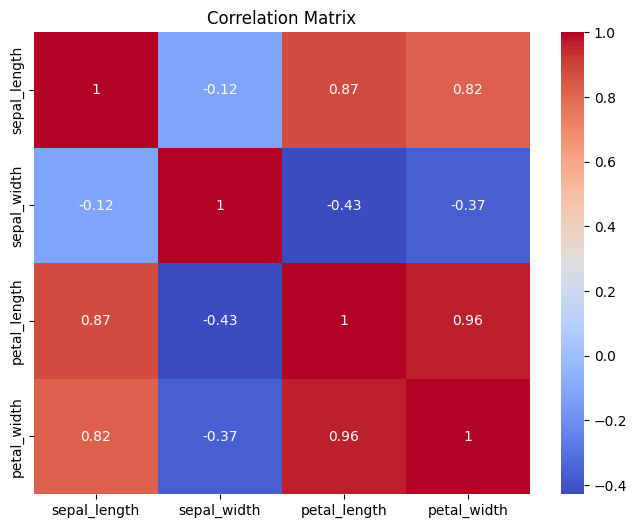

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# Display the first few rows of the dataset
print(df.head())

# Summary statistics for numeric data only
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Pairplot to visualize the relationships between variables, using 'species' as hue
sns.pairplot(df, hue='species')
plt.show()

# Boxplots for each numeric feature split out by species
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'{feature} by Species')
    plt.show()

# Correlation matrix for numeric features only
# Extracting numeric columns (excluding 'species' as it's categorical)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining, summarizing, and visualizing the underlying characteristics of data to extract important insights before formal modeling commences. EDA aims to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

Correlational Matrix: The matrix shows the pairwise correlation coefficients for different measurements, which, in this context, appear to be from the Iris dataset.
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to +1 indicate a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. Values closer to -1 indicate a strong negative correlation, where one variable increases as the other decreases. Values around 0 indicate no linear correlation between the variables.

Boxplot visualizes the distribution of petal widths across the three species of the Iris flower: setosa, versicolor, and virginica. The 'setosa' species shows a much narrower range of petal widths with a lower median compared to the other two species, and it has a couple of outliers on the lower end. 'Versicolor' has a wider range of petal widths than 'setosa', but less than 'virginica', with no outliers. 'Virginica' displays the widest range of petal widths with the highest median value, indicating that this species generally has the largest petal widths. The 'whiskers' of the plot indicate the variability outside the upper and lower quartiles, and any points outside of these whiskers are plotted as individual points that may be considered outliers.

Pair plot, also known as a scatterplot matrix, and it depicts the relationships between different pairs of variables from the Iris dataset. Each scatter plot shows the relationship between two of the features (sepal length, sepal width, petal length, and petal width), with points colored according to Iris species (setosa, versicolor, and virginica). Along the diagonal are density plots for each feature, displaying the distribution of that feature's values within each species. This kind of plot is a powerful EDA tool because it reveals the correlations between variables, the distribution of single variables, and the distinct clustering of species along certain feature axes, all in one comprehensive figure.


## CNN

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing the data
# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize the images to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1290 - accuracy: 0.9601 - val_loss: 0.0433 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0259 - val_accuracy: 0.9919
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0301 - val_accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 73s

Convolutional Neural Networks (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. They are particularly known for their ability to detect complex patterns in images, such as edges, textures, and shapes, which they accomplish through a series of convolutional layers that filter inputs for useful information. These layers are followed by pooling layers that reduce dimensionality and fully connected layers for classification. CNNs leverage shared weights in convolutional layers and local connectivity to efficiently handle the high dimensionality of raw images. This architectural innovation allows CNNs to achieve state-of-the-art results in tasks like image and video recognition, image classification, medical image analysis, and more.

## Conclusion

In conclusion, this notebook has provided a comprehensive survey of essential data science techniques and concepts. It has systematically addressed a range of methodologies from basic data visualization to the complexities of machine learning algorithms. Utilizing datasets such as Iris and MNIST as practical examples, we have demonstrated the application of statistical models and neural network architectures. This exploration serves as both a foundational introduction for novices and a structured review for experienced practitioners. It is hoped that the knowledge imparted herein will prove beneficial for further academic inquiry or professional application in the field of data science.


## References
Kaggle: https://www.kaggle.com

Towards Data Science on Medium: https://towardsdatascience.com

DataCamp: https://www.datacamp.com

Stack Overflow: https://stackoverflow.com

GitHub: https://github.com

INFO 6105 Book by Prof. Nick Bear Brown

Iris Data Set Link: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

MNIST Dataset

Referred to previous Notebooks submitted suring the course.




## Licenses
MIT License

Copyright (c) 2024 chinm4y

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.